In [1]:
# TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
# Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
# En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
# solución que habéis realizado y los resultados obtenidos.
# El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
# ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
# la evolución del error de entrenamiento y de validación durante el entrenamiento.
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
# Instituto BME.

In [2]:
# 7.- Diseña un modelo en Keras para el mismo conjunto de datos del ejercicio 6 pero
# convirtiendo los datos a gráfico de bolsa y leyendo las imágenes. Usa el tipo de imágenes
# que creas mas conveniente (de barras, de velas, lineal…).

In [3]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM, GRU, MaxPooling1D, Conv2D, MaxPooling2D, Dropout, Bidirectional, Reshape, Activation

import numpy as np
import pandas as pd

from tensorflow import keras

2.11.0


In [4]:
def datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model):
    salida=np.zeros((17))
    #trainableParams
    salida[0] = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    #nonTrainableParams
    salida[1] = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    #totalParams
    salida[2] = salida[0] + salida[1]
    
    #Train
    score = model.evaluate(x_train, t_train)
    salida[3] = score[0]
    salida[4] = score[1]
    y_hat = model.predict(x_train)
    # El  error de la predicion en train
    salida[5] = np.mean(abs(y_hat[:,0]-t_train))
    # La media de error en la prediccion en train 
    salida[6] =np.mean(np.abs(t_train))
    
    #Test
    score = model.evaluate(x_test, t_test)
    salida[7] = score[0]
    salida[8] = score[1]
    y_hat_test = model.predict(x_test)
    # El  error de la predicion en test
    salida[9] = np.mean(abs(y_hat_test[:,0]-t_test))
    # La media de error en la prediccion en test
    salida[10] = np.mean(np.abs(t_test))
    
    # numero de datos de entrada en train
    salida[11] = x_train.shape[0]
    #dimensiones de la entrada
    salida[12] =len(x_train.shape)
    # valor de la dimension 1 de la entrada
    if salida[12] >= 1:
        salida[13] = x_train.shape[0]
    # valor de la dimension 2 de la entrada
    if salida[12] >= 2:
        salida[14] = x_train.shape[1]
    # valor de la dimension 3 de la entrada
    if salida[12] >= 3:
        salida[15] = x_train.shape[2]
    # valor de la dimension 4 de la entrada
    if salida[12] >= 4:
        salida[16] = x_train.shape[3]
    
    print(len(salida))
    
    import pandas as pd 
    df = pd.read_csv ('metricas.csv', index_col=0) 
    print(df.shape)
    df[model_title] = salida
    df.to_csv('metricas.csv') 

    return salida, df


In [5]:
def sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Open'].values
    msft_op = dd_msft['Open'].values
    fb_op = dd_fb['Open'].values
    aapl_op = dd_aapl['Open'].values
    googl_op = dd_googl['Open'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,0] = data_msft
    DAT[:,2] = data_fb
    DAT[:,3] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT[:,0], label='data_msft')
    ax4.plot(DAT[:,1], label='data_amzn')
    ax4.plot(DAT[:,2], label='data_fb')
    ax4.plot(DAT[:,3], label='data_aapl')
    ax4.plot(DAT[:,4], label='data_googl')
    ax4.legend()

    
    return DAT



In [6]:
def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar el valor del día
    #actual
    #Ntr = np.floor(DAT_TS.shape[0]/2)
    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]


    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
    return x_train, x_test, t_train, t_test



In [7]:
def generador_de_imagenes_de_x_train_y_x_test_y_guarda_data_imagenes_x_train_2_x_test_2 (x_train, x_test):
    #grafico cada una de las x_train y y_train pero rentando antes el valor de la 
    # cotizacion en el open del primer dia. 
    # Asi todas las graficas se parecen. Es una forma de hacer las graficas.
    # Se puede pensar mucahs otras formas que probablemente ayude al algoritmo
    # a aprender.
    import numpy as np 
    import pandas as pd 
    import matplotlib.pyplot as plt 

    #TRAIN
    nombre = []
    x_train_2 = np.zeros((x_train.shape[0],100,100,3)) # inicializo almacen de todas las imagenes en un np

    for i in range(0,x_train.shape[0]):
        fig, ax = plt.subplots(figsize=(10, 7))
        plt.axis('off')
        ax.plot(pd.DataFrame(x_train[i]).iloc[:,0] - pd.DataFrame(x_train[i]).iloc[0,0])
        ax.plot(pd.DataFrame(x_train[i]).iloc[:,1] - pd.DataFrame(x_train[i]).iloc[0,1])
        ax.plot(pd.DataFrame(x_train[i]).iloc[:,2] - pd.DataFrame(x_train[i]).iloc[0,2])
        ax.plot(pd.DataFrame(x_train[i]).iloc[:,3] - pd.DataFrame(x_train[i]).iloc[0,3])
        ax.plot(pd.DataFrame(x_train[i]).iloc[:,4] - pd.DataFrame(x_train[i]).iloc[0,4])
        #fig.savefig(f'imagenes/{i}', format='png')


        if i<10:
            ii = f'000{i}'
        if 9<i<100:
            ii = f'00{i}'
        if 99<i<1000:
            ii = f'0{i}'

        fig.savefig(f'imagenes_train/{ii}.png', bbox_inches='tight',dpi = 100)

        nombre.append( f'{ii}')
        #print(nombre[i])
        plt.close(fig)

        #leo las imagenes y las pongo en un grupo de datos (#datos,#lado,#alto,#canales)
        # datos = x_train.shape[0]
        # lado = 100
        # alto = 100
        # canales = 3 pg no lo he dividido a RGB todavia, entonces se que deberia quedar en 3 dimensiones al grabado
        import PIL.Image
        image = PIL.Image.open(f'imagenes_train/{nombre[i]}.png')
        Imsize = 100 # al ser solo 900 imagenes en train; si le pongo 3 cananles de 200 por 200, tengo que poner 
        # muchos parametros a entrenar y eso no es bueno ni necesario
        image_arr = np.asarray(image.resize((Imsize,Imsize)))
        image_norm = image_arr[:,:,0:3].astype(np.float32)/255


        image_exp_dims = np.expand_dims(image_norm,0)
        plt.figure()

        #plt.imshow(image_norm,vmin=0,vmax=1), plt.axis('off')
        #fig.savefig(f'imagenes/0000_rvg.png', bbox_inches='tight',dpi = 100)
        #plt.show()
        x_train_2[i,:,:,:] = image_exp_dims    
        # print(x[i,:,:,:].mean())
        # print(x[i,:,:,:].max())

    #TEST
    nombre = []
    x_test_2 = np.zeros((x_test.shape[0],100,100,3)) # inicializo almacen de todas las imagenes en un np

    for i in range(0,x_test.shape[0]):
        fig, ax = plt.subplots(figsize=(10, 7))
        plt.axis('off')
        ax.plot(pd.DataFrame(x_test[i]).iloc[:,0] - pd.DataFrame(x_test[i]).iloc[0,0])
        ax.plot(pd.DataFrame(x_test[i]).iloc[:,1] - pd.DataFrame(x_test[i]).iloc[0,1])
        ax.plot(pd.DataFrame(x_test[i]).iloc[:,2] - pd.DataFrame(x_test[i]).iloc[0,2])
        ax.plot(pd.DataFrame(x_test[i]).iloc[:,3] - pd.DataFrame(x_test[i]).iloc[0,3])
        ax.plot(pd.DataFrame(x_test[i]).iloc[:,4] - pd.DataFrame(x_test[i]).iloc[0,4])
        #fig.savefig(f'imagenes/{i}', format='png')


        if i<10:
            ii = f'000{i}'
        if 9<i<100:
            ii = f'00{i}'
        if 99<i<1000:
            ii = f'0{i}'

        fig.savefig(f'imagenes_test/{ii}.png', bbox_inches='tight',dpi = 100)

        nombre.append( f'{ii}')
        #print(nombre[i])
        plt.close(fig)

        #leo las imagenes y las pongo en un grupo de datos (#datos,#lado,#alto,#canales)
        # datos = x_test.shape[0]
        # lado = 100
        # alto = 100
        # canales = 3 pg no lo he dividido a RGB todavia, entonces se que deberia quedar en 3 dimensiones al grabado
        import PIL.Image
        image = PIL.Image.open(f'imagenes_test/{nombre[i]}.png')
        Imsize = 100 # al ser solo 900 imagenes en train; si le pongo 3 cananles de 200 por 200, tengo que poner 
        # muchos parametros a entrenar y eso no es bueno ni necesario
        image_arr = np.asarray(image.resize((Imsize,Imsize)))
        image_norm = image_arr[:,:,0:3].astype(np.float32)/255


        image_exp_dims = np.expand_dims(image_norm,0)
        plt.figure()

        # plt.imshow(image_norm,vmin=0,vmax=1), plt.axis('off')
        # fig.savefig(f'imagenes/0000_rvg.png', bbox_inches='tight',dpi = 100)
        #plt.show()
        x_test_2[i,:,:,:] = image_exp_dims    
        # print(x[i,:,:,:].mean())
        # print(x[i,:,:,:].max())
    return x_train_2, x_test_2


In [8]:
# Evaluamos el modelo segun los datos mas generales para evaluarlo
# PARA USARLO PARA EL TFM; COMPLETO CON accuracy Y val_accuracy AUNQUE NO ES EJERCICIO
# DE CLASIFICAION Y VALERO DIJO QUE accuracy SOLO LO VIERAMOS EN EJERCICIOS DE CLASIFICION

def graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist):
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Train
    score = model.evaluate(x_train, t_train)
    print('SCORE DE TRAIN:')
    print(score)

    #Test
    print('SCORE DE TEST:')
    score_1 = model.evaluate(x_test, t_test)
    print(score_1)

    n_epochs = len(hist.history['loss'])
    hd = hist.history
    epochs = range(1, n_epochs+1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], "r", label="train")
    plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    return score, score_1

In [9]:
# Cree esta funcion segun lo que Valero son ensenaba en clase
# PARA USARLO PARA EL TFM;

def ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model):
    
    #ESTUDIO GRAFICO DE RESULTADOS PARA EVALUAR
    # Evaluamos el modelo en train
    score = model.evaluate(x_train, t_train, verbose=0)
    print(f'Evaluamos el modelo en train_score: {score}')

    # Predecimos con los datos de train
    y_hat = model.predict(x_train)
    print(f'Predecimos con los datos de train: {np.mean(abs(y_hat[:,0]-t_train))}')
    print(f'Predecimos con los datos de train_cantidad/dimensiones de datos:{y_hat.shape}')
    print(f' La media de error en la prediccion en entrenamiento es: {np.mean(np.abs(t_train))}')

    # Predecimos con los datos de test
    y_hat_test = model.predict(x_test)
    print(f' El  error de la predicion usando datos de test es de : {np.mean(abs(y_hat_test[:,0]-t_test))}')
    print(f' La media de error en la prediccion en test es: {np.mean(np.abs(t_test))}')

    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 10)) 
    # Mostramos las predicciones de entrenamiento
    print(f'Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:')

    #plt.figure()
    ax1.plot(y_hat[:,0], label='y_hat[:,0] datos')    
    ax1.plot(t_train, label='t_train predicciones')
    ax1.grid(True)
    #ax1.xlabel("valores")
    #ax1.ylabel("nuero de dato ordinalmente")
    ax1.legend()

    #plt.figure()
    ax2.plot(t_train,y_hat[:,0],'.', label='t_train VSy_hat[:,0],')
    ax2.grid(True)
    #ax2.xlabel("t_train")
    #ax2.ylabel("y_hat[:,0],")
    ax2.legend()

    # Mostramos las predicciones de test
    ax3.plot(y_hat_test[:,0], label='y_hat_test[:,0] datos')
    ax3.plot(t_test, label=' t_testpredicciones')
    ax3.grid(True)
    #ax3.xlabel("valores")
    #ax3.ylabel("nuero de dato ordinalmente")
    ax3.legend()

    ax4.plot(t_test,y_hat_test[:,0],'.', label='t_test VS y_hat_test[:,0]')
    ax4.grid(True)
    #ax4.xlabel("t_test")
    #ax4.ylabel("y_hat_test[:,0]")
    ax4.legend()

    
    ax5.plot(model.weights[0].numpy().reshape(-1),'o-',label="Pesos neurona primera capa")
    ax5.grid(True)
    #ax5.xlabel("numero de la neurona ordinalmente")
    #ax5.ylabel("peso de la neurona")
    #ax5.title("Pesos neurona primera capa")
    ax5.legend()
    
    return



In [10]:
def activo_caso_1(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    # modelo con 3 capas de Conv2D y con mas cositinas y una densa al final
    model = Sequential()
    #Vamos añadiendo capas
    model.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(100,100,3), padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    #model.add(MaxPooling2D(2))
    model.add(Conv2D(2, kernel_size=5, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(4))
    model.add(Conv2D(2, kernel_size=3, activation='relu', padding='same'))
    #                activity_regularizer=regularizers.l1(0.2)))
    model.add(MaxPooling2D(4))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1))

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [11]:
def activo_caso_2(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    model = Sequential()
    model.add(Conv2D(10, 3, input_shape=(100,100,3), padding='same'))
    #model.add(Conv2D(10, 3, input_shape=(10,5,), padding='same'))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2))
    model.add(Reshape((50*50,10))) #https://github.com/keras-team/keras/issues/4172
    model.add(LSTM(5,return_sequences=True))
    #model.add(Bidirectional(GRU(20), input_shape=(10,1), merge_mode="ave"))
    model.add(GRU(5))
    model.add(Flatten())
    model.add(Dense(1))

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [12]:
def activo_caso_3(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    model = Sequential()
    model.add(Conv2D(10,3, input_shape=(100,100,3),padding='same'))
    model.add(Reshape((100*100,10)))
    model.add(GRU(5,return_sequences=True))
    model.add(LSTM(5))
    model.add(Flatten())
    model.add(Dense(1))

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [13]:
def activo_caso_4(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    # Otra posibilidad 2 convolucionales 2D y 2 densas
    model = Sequential()
    model.add(Conv2D(5, 3, input_shape=(100,100,3), padding='same'))
    model.add(Conv2D(5, 3, padding='valid'))
    model.add(Flatten())
    model.add(Dense(3))
    model.add(Dense(1))

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-6-243fa2c98d37>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-6-243fa2c98d37>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

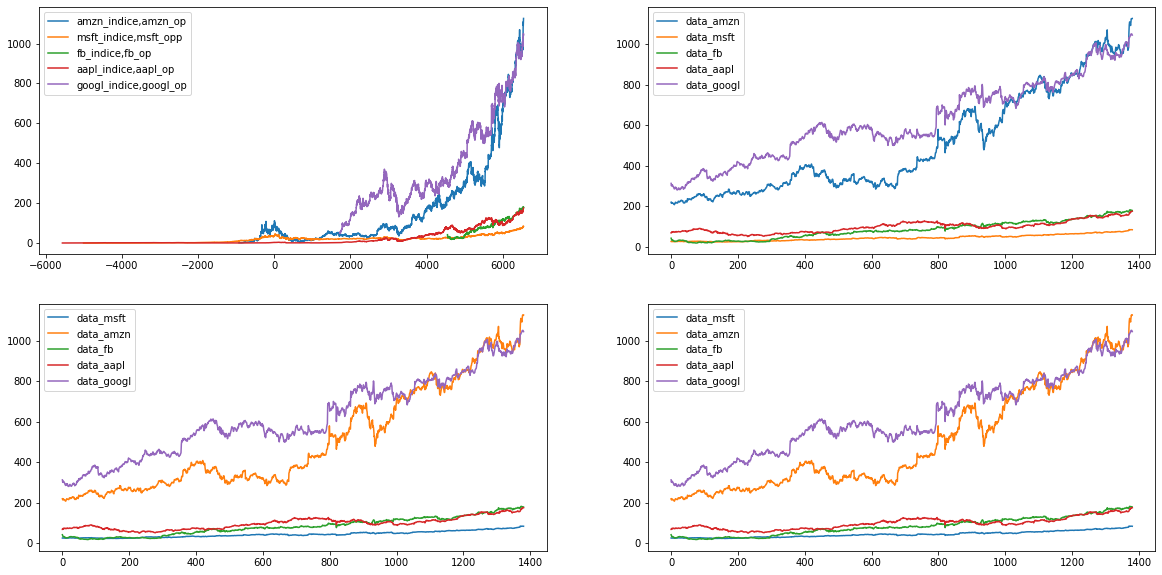

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
x_train_2, x_test_2 = generador_de_imagenes_de_x_train_y_x_test_y_guarda_data_imagenes_x_train_2_x_test_2 (x_train, x_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.7 MB/s eta 0:00:00
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 5)       140       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 5)      20        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100, 100, 5)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 2)       252       
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 2)      8         
 hNormalization)            

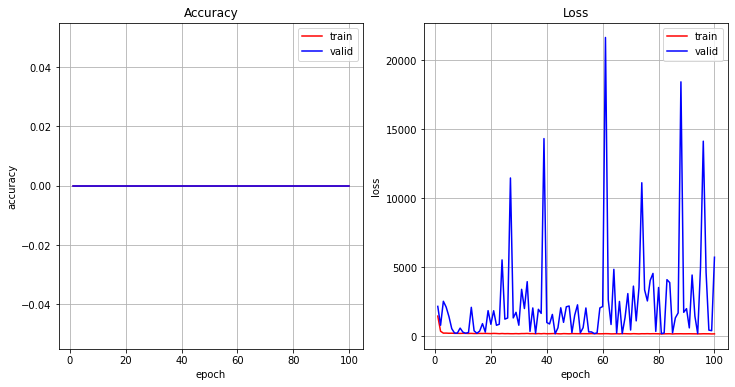

Evaluamos el modelo en train_score: [5818.876953125, 0.0]
29/29 [==============================] - 0s 3ms/step
Predecimos con los datos de train: 74.85483724699363
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 44.24939803707742
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 74.94117886844323
 La media de error en la prediccion en test es: 44.127174392935984
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 4ms/step
17
(17, 54)


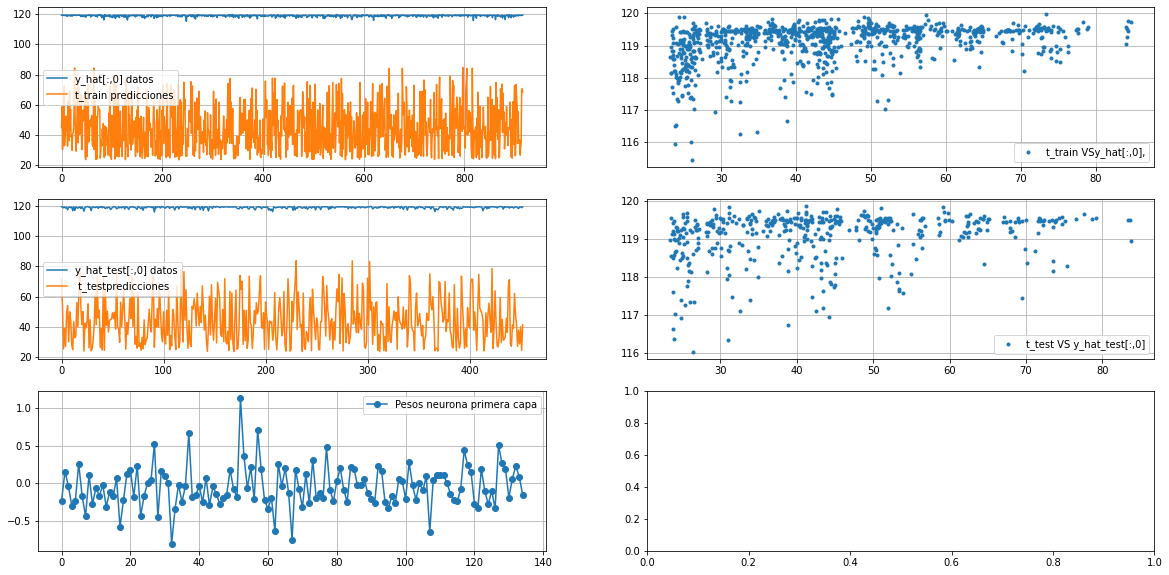

In [15]:
model, hist = activo_caso_1(x_train_2, x_test_2, t_train, t_test)
model_title = 'EJ_7_CASO_1_Conv2D(5_Conv2D(2_Conv2D(2_Dense(1_normalizado_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train_2, t_train, x_test_2, t_test, model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 10)      280       
                                                                 
 activation (Activation)     (None, 100, 100, 10)      0         
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 10)       0         
 2D)                                                             
                                                                 
 reshape (Reshape)           (None, 2500, 10)          0         
                                                                 
 lstm (LSTM)                 (None, 2500, 5)           320       
                                                      

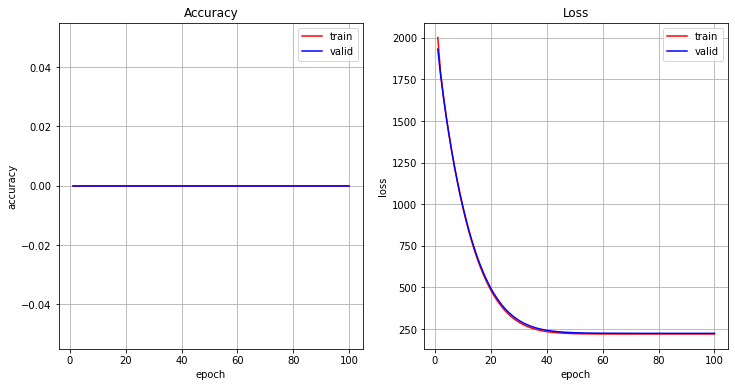

Evaluamos el modelo en train_score: [221.02902221679688, 0.0]
29/29 [==============================] - 2s 46ms/step
Predecimos con los datos de train: 12.176677464975006
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 44.24939803707742
15/15 [==============================] - 1s 46ms/step
 El  error de la predicion usando datos de test es de : 11.962587010600444
 La media de error en la prediccion en test es: 44.127174392935984
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 1s 54ms/step
17
(17, 54)


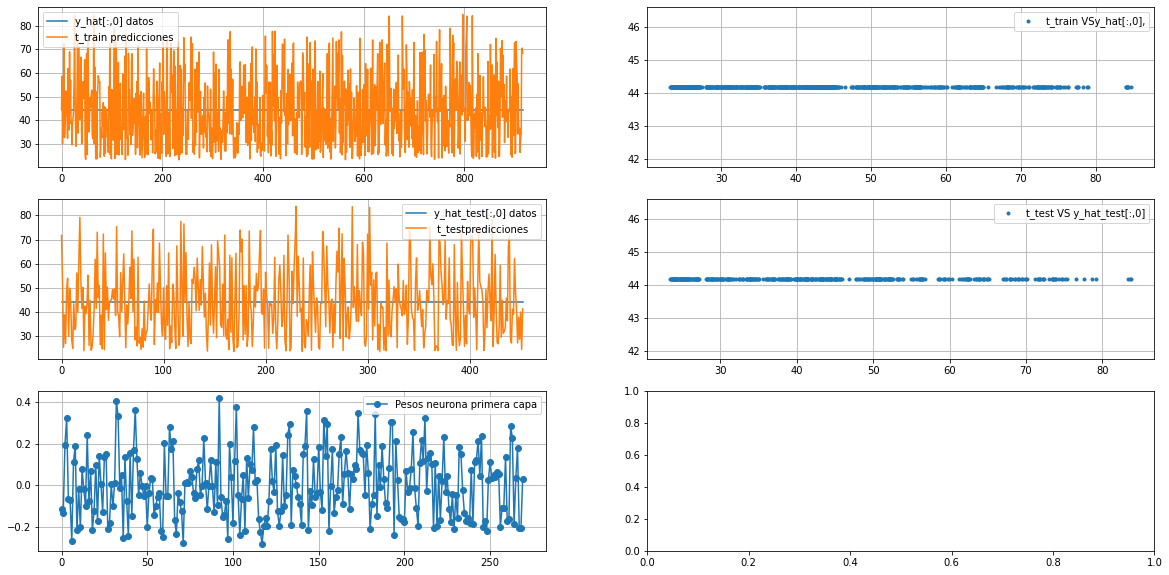

In [16]:
#DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
#x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
#x_train_2, x_test_2 = generador_de_imagenes_de_x_train_y_x_test_y_guarda_data_imagenes_x_train_2_x_test_2 (x_train, x_test)
model, hist = activo_caso_2(x_train_2, x_test_2, t_train, t_test)
model_title = 'EJ_7_CASO_2_Conv2D(10, 3,_MaxPooling2D(2_LSTM(5_GRU(5_Dense(1_normalizado_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train_2, t_train, x_test_2, t_test, model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 10)      280       
                                                                 
 reshape_1 (Reshape)         (None, 10000, 10)         0         
                                                                 
 gru_1 (GRU)                 (None, 10000, 5)          255       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 761
Trainable params: 761
Non-trainable 

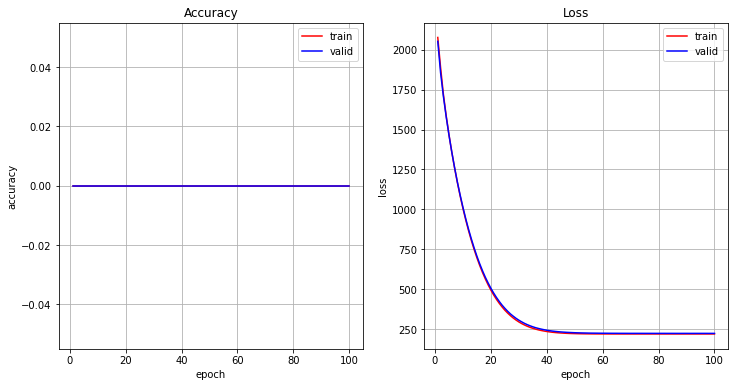

Evaluamos el modelo en train_score: [221.0243682861328, 0.0]
29/29 [==============================] - 5s 164ms/step
Predecimos con los datos de train: 12.18390237057352
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 44.24939803707742
15/15 [==============================] - 3s 195ms/step
 El  error de la predicion usando datos de test es de : 11.968775340099208
 La media de error en la prediccion en test es: 44.127174392935984
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 2s 159ms/step
17
(17, 54)


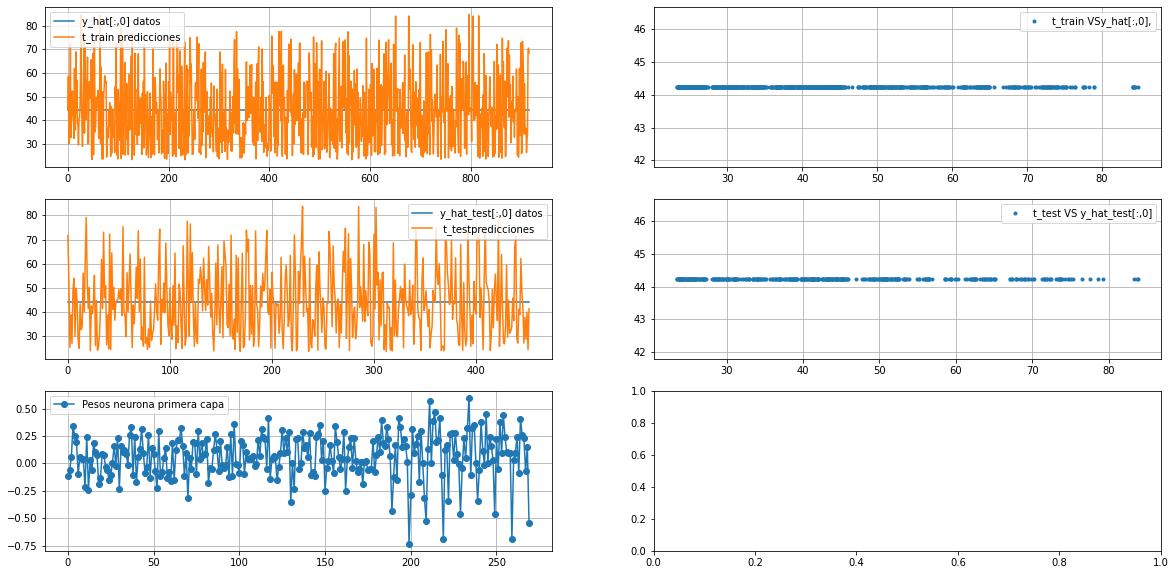

In [17]:
#DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
#x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
#x_train_2, x_test_2 = generador_de_imagenes_de_x_train_y_x_test_y_guarda_data_imagenes_x_train_2_x_test_2 (x_train, x_test)
model, hist = activo_caso_3(x_train_2, x_test_2, t_train, t_test)
model_title = 'EJ_7_CASO_3_Conv2D(10,3_GRU(5__LSTM(5_Dense(1_normalizado_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train_2, t_train, x_test_2, t_test, model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 5)       140       
                                                                 
 conv2d_6 (Conv2D)           (None, 98, 98, 5)         230       
                                                                 
 flatten_3 (Flatten)         (None, 48020)             0         
                                                                 
 dense_3 (Dense)             (None, 3)                 144063    
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 144,437
Trainable params: 144,437
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [=============================

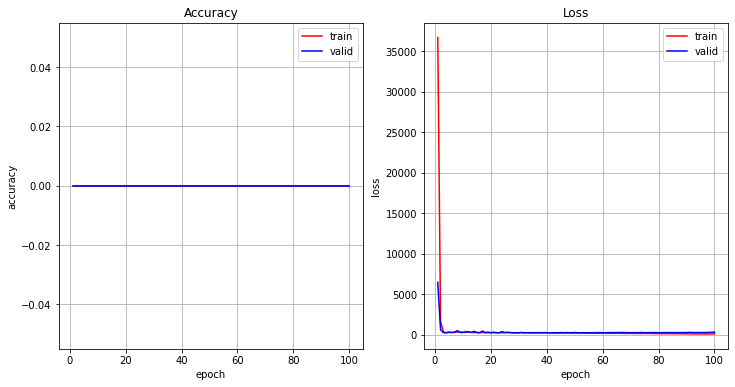

Evaluamos el modelo en train_score: [110.87787628173828, 0.0]
29/29 [==============================] - 0s 4ms/step
Predecimos con los datos de train: 7.99972686619483
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 44.24939803707742
15/15 [==============================] - 0s 4ms/step
 El  error de la predicion usando datos de test es de : 12.54668535049809
 La media de error en la prediccion en test es: 44.127174392935984
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 4ms/step
17
(17, 54)


In [ ]:
#DAT = sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
#x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
#x_train_2, x_test_2 = generador_de_imagenes_de_x_train_y_x_test_y_guarda_data_imagenes_x_train_2_x_test_2 (x_train, x_test)
model, hist = activo_caso_4(x_train_2, x_test_2, t_train, t_test)
model_title = 'EJ_7_CASO_4_Conv2D(5, 3_Conv2D(5, 3_Dense(3_Dense(1_normalizado_SIN_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train_2, t_train, x_test_2, t_test, model)

In [ ]:
# EN CLASE DIJO QUE ENTRENARAMOS UN MODELO, NO QUE LOS EVALUARAMOS CON OTROS DE OTROS PUNTOS
# ENTONCES SOLO ENTRENO EL MODELO Y YA. Y esto ha ido con 4. Entiendo que cumplo con el enunciado
# Podemos cambiar hiperparametros, etc....